In [1]:
# Xgboost model for predicting the 'Frailty_Score' of the patients

import pandas as pd
import numpy as np
from features import *
from processing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing the dataset
file_path = 'P:\DATA_OCT_22\Expert_Eye\Dataset\Data\global_dataset.xlsx'
df = pd.read_excel(file_path)
data = df.copy()

In [3]:
# Data Preprocessing
# Drop Foldename column
data = data.drop(columns=['Foldername'])

# Drop the rows that have missing values in 'Frailty_Score' column
data = data.dropna(subset=['Frailty_Score'])

# Drop the columns that have more than 50% of missing values in the dataset
data = data.dropna(thresh=0.5*len(data), axis=1)


In [ ]:
# Imputation
imputed_data = regression_imputation(data)

In [7]:
# Rename columns to remove special characters
imputed_data.columns = imputed_data.columns.str.replace('[', '_')
imputed_data.columns = imputed_data.columns.str.replace(']', '_')
imputed_data.columns = imputed_data.columns.str.replace('<', '_')

for col in imputed_data.columns:
    if any(char in col for char in ['[', ']', '<']):
        print(f"Column {col} contains a disallowed character.")


C:\Users\matth\AppData\Local\Temp\ipykernel_2868\1571629773.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  imputed_data.columns = imputed_data.columns.str.replace('[', '_')
C:\Users\matth\AppData\Local\Temp\ipykernel_2868\1571629773.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  imputed_data.columns = imputed_data.columns.str.replace(']', '_')


In [8]:
X = imputed_data.drop(columns=['Frailty_Score'])
y = imputed_data['Frailty_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [9]:
# Training the Xgboost model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [10]:
# Predicting the test set results
y_pred = xgb.predict(X_test)

In [11]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
r2 = xgb.score(X_test, y_test)
print(f"R2 Score: {r2}")


Mean Squared Error: 1.0414517666502434
Root Mean Squared Error: 1.0205154416520328
R2 Score: 0.4362913306358629


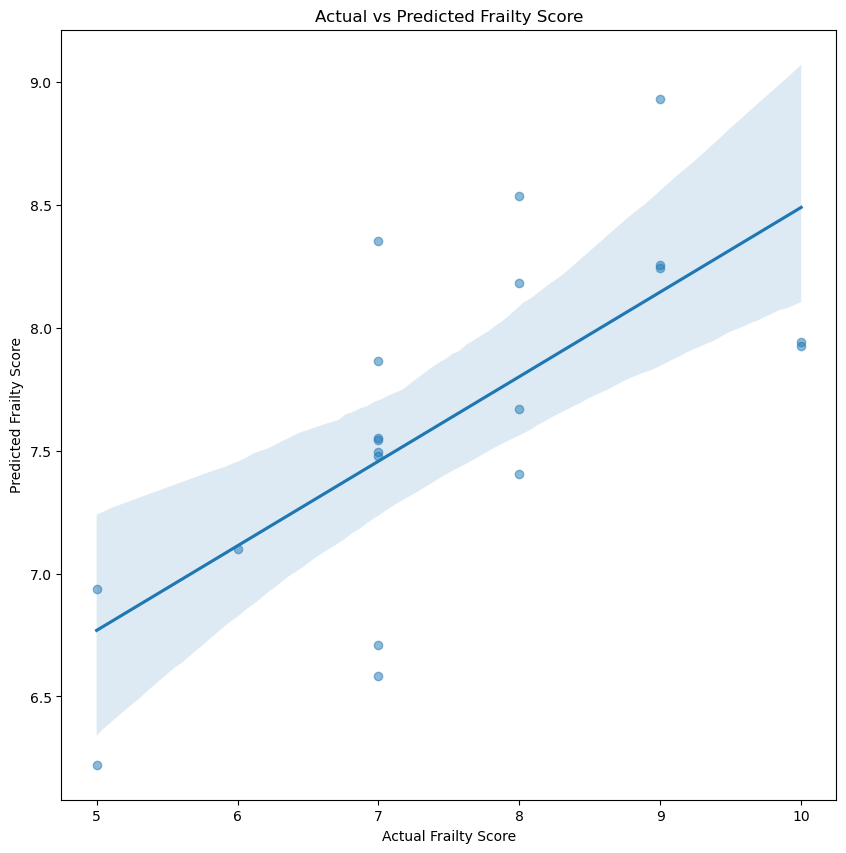

In [12]:
# Plotting the results
plt.figure(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Frailty Score')
plt.ylabel('Predicted Frailty Score')
plt.title('Actual vs Predicted Frailty Score')
plt.show()


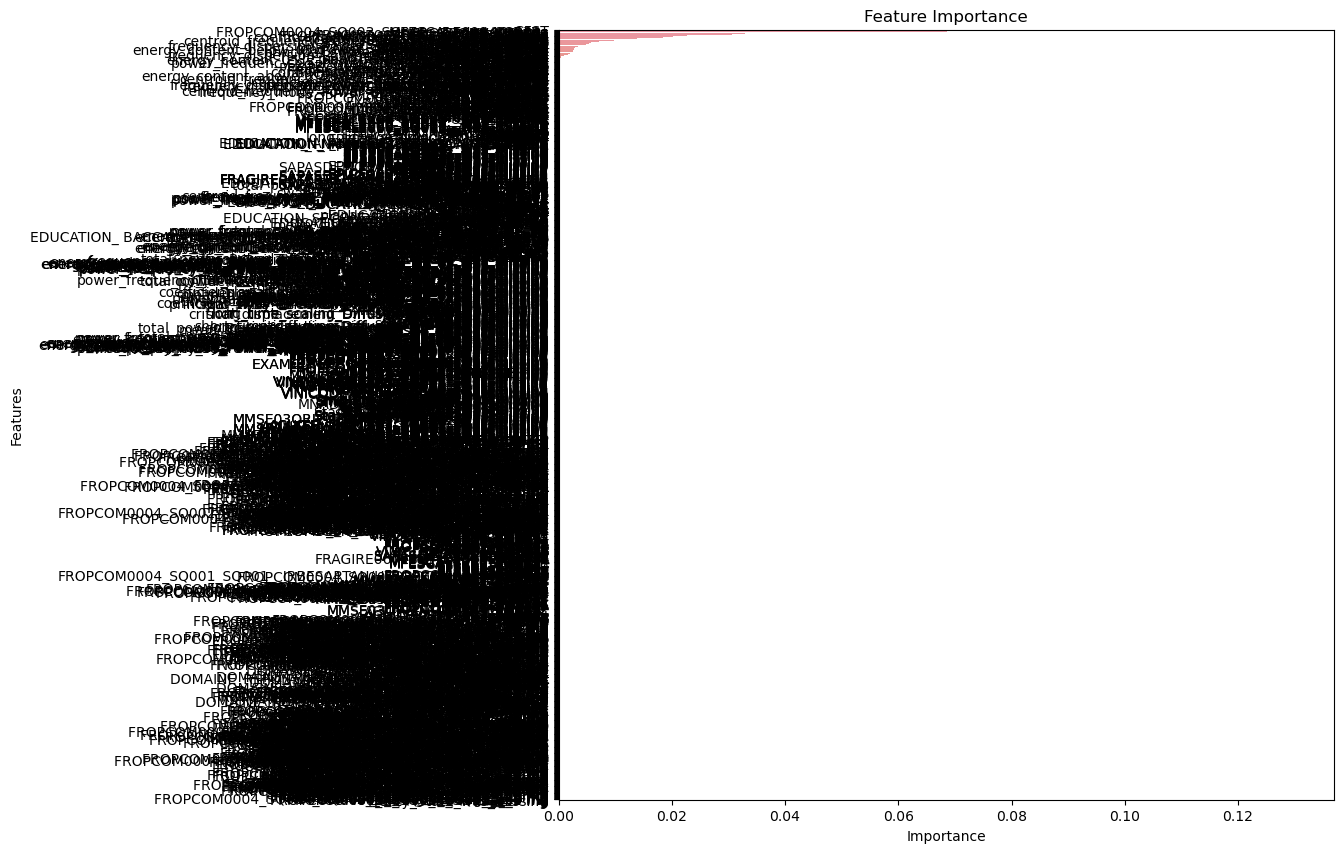

In [13]:
# Feature Importance
feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': xgb.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Features', data=feature_importance)
plt.title('Feature Importance')
plt.show()


In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    }
grid_search = GridSearchCV(estimator=xgb,
                            param_grid=parameters,
                            scoring='r2',
                            cv=5,
                            n_jobs=-1)
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
print(f"Best Parameters: {best_parameters}")
best_score = grid_search.best_score_
print(f"Best Score: {best_score}")
